##Name :- Sahil Deepak Gawande
##Roll No. :- 25210110
##Branch :- MTech CSE

# Ques 1) How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Ans:- Let us consider two matrices with dimensions A(n,k) and matrix B(k,m).Thus the resulting matrix after the Multiplication will be C(n,m).

*   The element in i$^{th}$ row and j$^{th}$ column of matrix c ,denoted as $C_{ij}$ is calculated by taking the dot product of the i$^{th}$ row of matrix and the j$^{th}$ column of matrix B.


1)Multiplications-->

*   The dot product of a row vector with a column vector of length k involves k multiplications.
*   To find $C_{ij}$,we multiply the k elements of row i of A with th k elements of column j of B and sum the products.

 $C_{ij}$ = $\sum_{l=1}^{l=k}$ $A_{il}$ x $B_{lj}$



*   Since there are n×m elements in the resulting matrix C, and each element requires k multiplications, the total number of multiplications is n×m×k.


---


2) Additions -->
To calculate the sum of the k products for each element $C_{ij}$, you need to perform (k-1) additions.  


*   For example:  
$A_{i1}B_{1j}$ + $A_{i2}B_{2j}$
is one addition, and then you add the next term, and so on, until you have added all k terms.


*   Since there are n×m elements in the resulting matrix C, and each element requires k−1 additions, the total number of additions is n × m × (k−1).













##Ques 2) Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [ ]:
import random
import time
import numpy as np

# Matrix sizes
n, k, m = 200, 300, 150

#Generate random matrices (list of lists)
X_list = [[random.random() for _ in range(k)] for _ in range(n)]
Y_list = [[random.random() for _ in range(m)] for _ in range(k)]

#Multiply using list of lists
def matmul_list(X, Y):
    n = len(X)
    k = len(X[0])
    m = len(Y[0])

    #Initialize result matrix with zeros
    Z = [[0.0 for _ in range(m)] for _ in range(n)]

    for i in range(n):
        for j in range(m):
            total = 0.0
            for t in range(k):
                total += X[i][t] * Y[t][j]
            Z[i][j] = total
    return Z

start = time.time()
C_list = matmul_list(A_list, B_list)
end = time.time()
list_time = end - start
print(f"List of lists multiplication time: {list_time:.4f} seconds")


# Multiply using NumPy
A_np = np.array(A_list)
B_np = np.array(B_list)

start = time.time()
C_np =np.matmul(A_np, B_np)
end = time.time()
numpy_time = end - start
print(f"NumPy multiplication time: {numpy_time:.4f} seconds")


# Compare
if numpy_time < list_time:
    print("NumPy is faster.")
else:
    print("Lists were faster here (likely due to very small matrix size).")


List of lists multiplication time: 0.8363 seconds
NumPy multiplication time: 0.0011 seconds
NumPy is faster.


**NumPy is Faster as compared List for Large Matrices**

*  Vectorization: NumPy uses highly optimized C and Fortran routines that operate on contiguous memory blocks, avoiding Python loops.

*  Reduced overhead: Python loops have a lot of interpretation overhead; NumPy’s loops happen in compiled code.

*  For small matrices, the speed difference may be small or even reversed (due to function call overhead), but for large matrices NumPy is usually orders of magnitude faster.

##Ques 3)  Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

**Time Complexity of Finding th emedian of Arary using this Approach **

*  This method involves finding the highest element in one pass, then the second highest in a second pass, and so on, until we reach the median element.

*  To find the highest element, we  need to scan through all N elements, which takes O(N) time. To find the second highest, we will again scan through the remaining elements or the whole array, ignoring the first highest, which also takes O(N) time.

*   Repeat this process for the third, fourth, and subsequent highest elements.

The median is the element at position N/2 . To find this element, we have to perform roughly N/2 passes of the array. Since each pass takes O(N) time, the total time complexity of these passes:

O(N) + O(N) + ....... + O(N)(N/2 times) = N/2 x O(N) = O($N^{2}$)
This is a very inefficient approach.



---

**The Optimal Method:**
Quickselect (O(N))
For finding the k-th smallest (or largest) element, such as the median, there is an even better algorithm called Quickselect.

*  Quickselect is a selection algorithm that is a variation of the Quicksort algorithm. Instead of sorting the entire array, it efficiently partitions the array around a pivot and then recursively searches for the median in only one of the partitions. This allows it to find the median in O(N) average time. While its worst-case time is O($N^2$), this is extremely rare in practice.

The Quickselect algorithm is the most optimal solution for finding the median because its average-case time complexity is linear.



In [ ]:
import random
import time
import numpy as np

# Method 1: Repeated passes method
def repeated_passes_median(arr):
    n = len(arr)
    arr_copy = arr.copy()
    for _ in range(n // 2):
        max_val = max(arr_copy)
        arr_copy.remove(max_val)
    return max(arr_copy)

# Method 2: Quickselect
def quickselect(arr, k):
    if len(arr) == 1:
        return arr[0]
    pivot = random.choice(arr)
    lows = [x for x in arr if x < pivot]
    highs = [x for x in arr if x > pivot]
    pivots = [x for x in arr if x == pivot]

    if k < len(lows):
        return quickselect(lows, k)
    elif k < len(lows) + len(pivots):
        return pivots[0]
    else:
        return quickselect(highs, k - len(lows) - len(pivots))

def quickselect_median(arr):
    n = len(arr)
    if n % 2 == 1:
        return quickselect(arr, n // 2)
    else:
        return 0.5 * (quickselect(arr, n // 2 - 1) + quickselect(arr, n // 2))

# Benchmark
sizes = [1000, 2000, 5000]
results = []

for size in sizes:
    data = [random.randint(0, 1000000) for _ in range(size)]

    # NumPy median
    start = time.time()
    median_np = np.median(data)
    time_np = time.time() - start

    # Repeated passes
    start = time.time()
    median_rep = repeated_passes_median(data)
    time_rep = time.time() - start

    # Quickselect
    start = time.time()
    median_qs = quickselect_median(data)
    time_qs = time.time() - start

    results.append((size, time_np, time_rep, time_qs))


print("| Array Size | NumPy Median (O(n log n)) | Repeated Passes (O(n²)) | Quickselect (O(n) avg.) |")
print("|------------|---------------------------|--------------------------|--------------------------|")
for size, time_np, time_rep, time_qs in results:
    print(f"| {size:<10} | {time_np:<25.6f} | {time_rep:<24.6f} | {time_qs:<24.6f} |")


| Array Size | NumPy Median (O(n log n)) | Repeated Passes (O(n²)) | Quickselect (O(n) avg.) |
|------------|---------------------------|--------------------------|--------------------------|
| 1000       | 0.004498                  | 0.015587                 | 0.001243                 |
| 2000       | 0.000450                  | 0.035715                 | 0.001222                 |
| 5000       | 0.000725                  | 0.314186                 | 0.003168                 |


# What is the gradient of the following function with respect to x and y?
# $x^2$y + $y^3$sin(x)

**Ans - >**

The gradient of f is the vector of its partial derivatives:


Δf = ($\frac{\partial f}{\partial x}$ , $\frac{\partial f}{\partial y}$ )

**Step 1:** Partial Derivative with respect to x
To find $\frac{\partial f}{\partial x}$, we treat y as a constant:


$$
\frac{\partial f}{\partial x} = \frac{\partial}{\partial x}(x^2 y) + \frac{\partial}{\partial x}(y^3 \sin(x))
$$

*  The derivative of $x^2 y$ is $2xy$.
*  The derivative of $y^3 \sin(x)$ is $y^3 \cos(x)$.

Combining these gives us:

$$
\frac{\partial f}{\partial x} = 2xy + y^3 \cos(x)
$$





**Step 2: Partial Derivative with respect **to y.
To find $\frac{\partial f}{\partial x}$,we treat x as a constant:

$$
\frac{\partial f}{\partial y} = \frac{\partial}{\partial y}(x^2 y) + \frac{\partial}{\partial y}(y^3 \sin(x))
$$

*  The derivative of $x^2 y$ is $x^2$.
*  The derivative of $y^3 \sin(x)$ is $3y^2 \sin(x)$.

Combining these gives us:
$$
\frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x)
$$

**Final Answer :**
By combining the partial derivatives from the two steps, we get the gradient vector:

$$
\nabla f = \left( 2xy + y^3 \cos(x),\quad x^2 + 3y^2 \sin(x) \right)
$$



# 5) Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [ ]:
import jax
import jax.numpy as jnp
import random

def f(x, y):
    """The original function."""
    return x**2 * y + y**3 * jnp.sin(x)

def analytical_gradient(x, y):
    """The analytical solution for the gradient."""
    df_dx = 2 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3 * y**2 * jnp.sin(x)
    return (df_dx, df_dy)

def main():
    print("Verifying the analytical gradient with JAX.\n")

    grad_f_x = jax.grad(f, argnums=0)
    grad_f_y = jax.grad(f, argnums=1)

    # Only one test case now
    x_val, y_val = random.uniform(-10, 10), random.uniform(-10, 10)

    print(f"Test Case:")
    print(f"Values: x = {x_val:.4f}, y = {y_val:.4f}\n")

    analytical_df_dx, analytical_df_dy = analytical_gradient(x_val, y_val)
    jax_df_dx = grad_f_x(x_val, y_val)
    jax_df_dy = grad_f_y(x_val, y_val)

    print("Analytical Gradient:")
    print(f"  ∂f/∂x = {analytical_df_dx:.6f}")
    print(f"  ∂f/∂y = {analytical_df_dy:.6f}\n")

    print("JAX Gradient:")
    print(f"  ∂f/∂x = {jax_df_dx:.6f}")
    print(f"  ∂f/∂y = {jax_df_dy:.6f}\n")

    is_x_close = jnp.allclose(analytical_df_dx, jax_df_dx)
    is_y_close = jnp.allclose(analytical_df_dy, jax_df_dy)

    print(f"Match for ∂f/∂x? {is_x_close}")
    print(f"Match for ∂f/∂y? {is_y_close}")
    print("-" * 20)

if __name__ == "__main__":
    main()


Verifying the analytical gradient with JAX.

Test Case:
Values: x = -1.2172, y = -1.5676

Analytical Gradient:
  ∂f/∂x = 2.482456
  ∂f/∂y = -5.434701

JAX Gradient:
  ∂f/∂x = 2.482456
  ∂f/∂y = -5.434702

Match for ∂f/∂x? True
Match for ∂f/∂y? True
--------------------


## Ques 6)

 Use sympy to confirm that you obtain the same gradient analytically.

In [ ]:
from sympy import symbols, sin, cos, diff

def main():
    # Define symbolic variables
    x, y = symbols('x y')

    # Define the function f(x, y)
    f = x**2 * y + y**3 * sin(x)
    print("Function: f(x, y) =", f)

    # Calculate the partial derivative with respect to x
    df_dx = diff(f, x)

    # Calculate the partial derivative with respect to y
    df_dy = diff(f, y)

    print("\n--- SymPy Analytical Gradient ---")
    print("∂f/∂x =", df_dx)
    print("∂f/∂y =", df_dy)

    # Manually derived solution
    print("\n--- Manually Derived Solution ---")
    print("∂f/∂x = 2*x*y + y**3*cos(x)")
    print("∂f/∂y = x**2 + 3*y**2*sin(x)")

    # Check for equality
    if df_dx == 2*x*y + y**3*cos(x) and df_dy == x**2 + 3*y**2*sin(x):
        print("\nConclusion: The SymPy results match the manually derived solution.")
    else:
        print("\nConclusion: The SymPy results do NOT match the manually derived solution.")

if __name__ == "__main__":
    main()


Function: f(x, y) = x**2*y + y**3*sin(x)

--- SymPy Analytical Gradient ---
∂f/∂x = 2*x*y + y**3*cos(x)
∂f/∂y = x**2 + 3*y**2*sin(x)

--- Manually Derived Solution ---
∂f/∂x = 2*x*y + y**3*cos(x)
∂f/∂y = x**2 + 3*y**2*sin(x)

Conclusion: The SymPy results match the manually derived solution.


## 7) Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [ ]:
students_records = {
    2022: {
        "Branch 1": {
            1: {
                "Name": "Neha",
                "Marks": {
                    "Maths": 100,
                    "English": 70,
                }
            },
            2: {
                "Name": "Manish",
                "Marks": {
                    "Maths": 90,
                    "English": 80,
                }
            },
        },
        "Branch 2": {
            1: {
                "Name": "Prasad",
                "Marks": {
                    "Maths": 80,
                    "English": 90,
                }
            },

            2: {
                "Name": "Aditya",
                "Marks": {
                    "Maths": 70,
                    "English": 80,
                }
            },
        }
    },
    2023: {
        "Branch 1": {
            1: {
                "Name": "Rohan",
                "Marks": {
                    "Maths": 60,
                    "English": 70,
                }
            },
            2: {
                "Name": "Sahil",
                "Marks": {
                    "Maths": 50,
                    "English": 60,
                }
            },
        },
        "Branch 2": {
            1: {
                "Name": "Tanmay",
                "Marks": {
                    "Maths": 40,
                    "English": 50,
                }
            },
            2: {
                "Name": "Stuti",
                "Marks": {
                    "Maths": 30,
                    "English": 40,
                }
            },
        }
    },
    2024: {
        "Branch 1": {
            1: {
                "Name": "Vivek",
                "Marks": {
                    "Maths": 20,
                    "English": 30,
                }
            },
            2: {
                "Name": "Om",
                "Marks": {
                    "Maths": 10,
                    "English": 20,
                }
            },
        },
        "Branch 2": {
            1: {
                "Name": "Devashish",
                "Marks": {
                    "Maths": 0,
                    "English": 10,
                }
            },
            2: {
                "Name": "Yasmin",
                "Marks": {
                    "Maths": 40,
                    "English": 20,
                }
            },
        }
    },
    2025: {
        "Branch 1": {
            1: {
                "Name": "Sarthak",
                "Marks": {
                    "Maths": 20,
                    "English": 30,
                }
            },
        },
        "Branch 2": {
            1: {
                "Name": "Aahan",
                "Marks": {
                    "Maths": 40,
                    "English": 50,
                }
            },
        }
    }
}

In [ ]:
## adding in to dictionary

students_records[2022]["Branch 1"][2] = {
    "Name": "Jayesh",
    "Marks": {
        "Maths": 85,
        "English": 90
    }
}


In [ ]:
## Acesss the dictonary

print(students_records[2022]["Branch 1"][1])

{'Name': 'Neha', 'Marks': {'Maths': 100, 'English': 70}}


##Ques 8) Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.



In [ ]:
from typing import List, Dict

class Student:
    def __init__(self, roll_number: int, name: str, marks: Dict[str, int]):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __repr__(self):
        return f"Student({self.roll_number}, {self.name}, {self.marks})"


class Branch:
    def __init__(self, name: str):
        self.name = name
        self.students: List[Student] = []

    def add_student(self, student: Student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch({self.name}, Students: {len(self.students)})"


class Year:
    def __init__(self, year: int):
        self.year = year
        self.branches: List[Branch] = []

    def add_branch(self, branch: Branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year({self.year}, Branches: {len(self.branches)})"


class Database:
    def __init__(self):
        self.years: List[Year] = []

    def add_year(self, year: Year):
        self.years.append(year)

    def __repr__(self):
        return f"Database(Years: {len(self.years)})"


def print_all_records(database):
    for year in database.years:
        print(f"Year: {year.year}")
        for branch in year.branches:
            print(f"  Branch: {branch.name}")
            for student in branch.students:
                print(f"    Roll Number: {student.roll_number}, Name: {student.name}, Marks: {student.marks}")


In [ ]:
db = Database()

# Create year 2022
year_2022 = Year(2022)

# Create branches
branch1 = Branch("Branch 1")
branch2 = Branch("Branch 2")

# Add students to Branch 1
branch1.add_student(Student(1, "Neha", {"Maths": 100, "English": 70}))
branch1.add_student(Student(2, "Manish", {"Maths": 90, "English": 80}))

# Add students to Branch 2
branch2.add_student(Student(1, "Prasad", {"Maths": 80, "English": 90}))
branch2.add_student(Student(2, "Aditya", {"Maths": 70, "English": 80}))

# Add branches to year
year_2022.add_branch(branch1)
year_2022.add_branch(branch2)

# Add year to database
db.add_year(year_2022)


In [ ]:
print_all_records(db)


Year: 2022
  Branch: Branch 1
    Roll Number: 1, Name: Neha, Marks: {'Maths': 100, 'English': 70}
    Roll Number: 2, Name: Manish, Marks: {'Maths': 90, 'English': 80}
  Branch: Branch 2
    Roll Number: 1, Name: Prasad, Marks: {'Maths': 80, 'English': 90}
    Roll Number: 2, Name: Aditya, Marks: {'Maths': 70, 'English': 80}


##Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 1) y=x

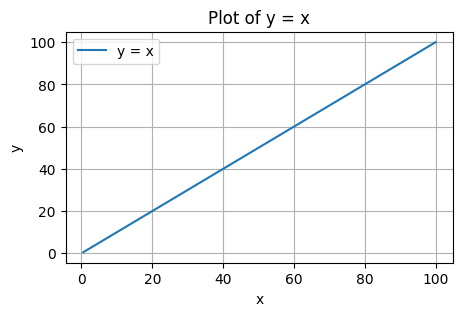

In [ ]:
# Define the domain
x = np.arange(0.5, 100.0 + 0.5, 0.5)

# Define the function y = x
y = x

# Plotting
plt.figure(figsize=(5, 3))
plt.plot(x, y, label='y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')
plt.legend()
plt.grid(True)
plt.show()


# 2) y=$x^2$

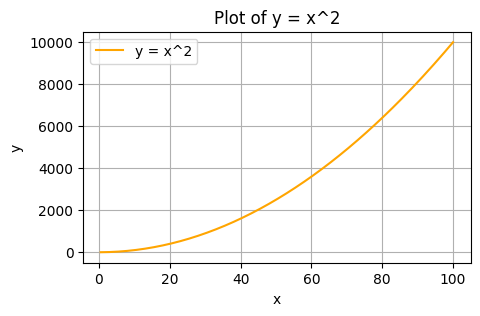

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain
x = np.arange(0.5, 100.0 + 0.5, 0.5)

# Define the function y = x^2
y = x ** 2

# Plotting
plt.figure(figsize=(5, 3))
plt.plot(x, y, label='y = x^2', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^2')
plt.legend()
plt.grid(True)
plt.show()


# 3) y=$\frac{x^3}{100}$  

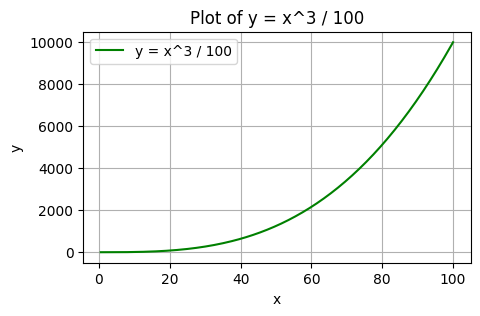

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain
x = np.arange(0.5, 100.0 + 0.5, 0.5)

# Define the function y = x^3 / 100
y = (x ** 3) / 100

# Plotting
plt.figure(figsize=(5, 3))
plt.plot(x, y, label='y = x^3 / 100', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^3 / 100')
plt.legend()
plt.grid(True)
plt.show()


## 4) sin(x)

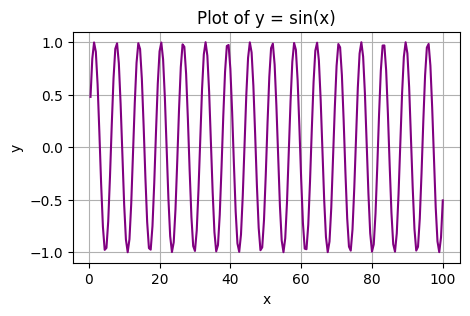

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Domain
x = np.arange(0.5, 100.0 + 0.5, 0.5)

# Function
y = np.sin(x)

# Plot
plt.figure(figsize=(5, 3))
plt.plot(x, y, label='y = sin(x)', color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)')

plt.grid(True)
plt.show()


### 5) $\frac{sin x}{x}$

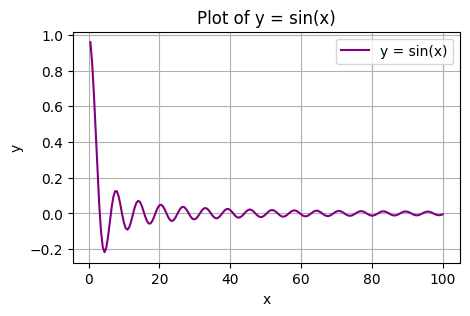

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Domain
x = np.arange(0.5, 100.0 + 0.5, 0.5)

# Function
y = np.sin(x) / x

# Plot
plt.figure(figsize=(5, 3))
plt.plot(x, y, label='y = sin(x)', color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)')
plt.legend()
plt.grid(True)
plt.show()


# 6) y= log(x)

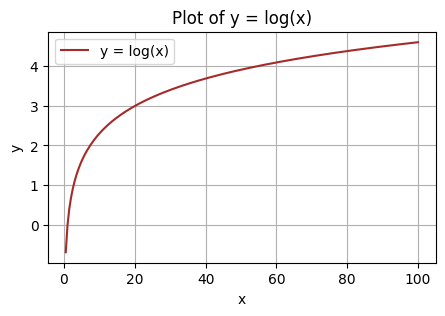

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define domain
x = np.arange(0.5, 100.0 + 0.5, 0.5)

# Compute y = log(x)
y = np.log(x)

# Plotting
plt.figure(figsize=(5, 3))
plt.plot(x, y, label='y = log(x)', color='brown')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = log(x)')
plt.legend()
plt.grid(True)
plt.show()


# 7) y= $e^x$

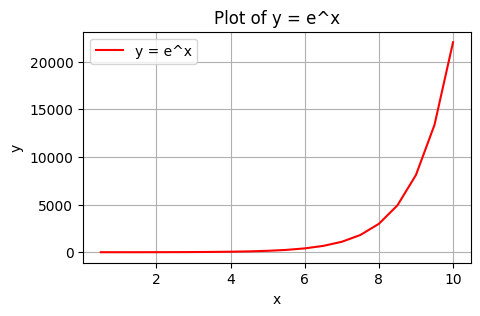

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define domain
x = np.arange(0.5, 10.0 + 0.5, 0.5)

# Compute y = e^x
y = np.exp(x)

# Plotting
plt.figure(figsize=(5, 3))
plt.plot(x, y, label='y = e^x', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = e^x')
plt.legend()
plt.grid(True)
plt.show()


# Ques 10) Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [ ]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(low=1, high=2, size=(20, 5))

df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

col_std = df.std()
col_with_highest_std = col_std.idxmax()
highest_std_value = col_std.max()

print(f"Column with highest std deviation: '{col_with_highest_std}' (std = {highest_std_value:.4f})")

row_means = df.mean(axis=1)
row_with_lowest_mean = row_means.idxmin()
lowest_mean_value = row_means.min()

print(f"Row with lowest mean: Index {row_with_lowest_mean} (mean = {lowest_mean_value:.4f})")




Column with highest std deviation: 'c' (std = 0.3146)
Row with lowest mean: Index 9 (mean = 1.1693)



# Ques 11) Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [ ]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(low=1, high=2, size=(20, 5))

df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])


df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

count_lt8 = (df['g'] == 'LT8').sum()


std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print(f"Number of rows where 'g' == 'LT8': {count_lt8}")
print(f"Standard deviation of 'f' where 'g' == 'LT8': {std_lt8:.4f}")
print(f"Standard deviation of 'f' where 'g' == 'GT8': {std_gt8:.4f}")


Number of rows where 'g' == 'LT8': 15
Standard deviation of 'f' where 'g' == 'LT8': 0.2998
Standard deviation of 'f' where 'g' == 'GT8': 0.1928


In [ ]:
import numpy as np

a = np.array([1, 2, 3])


b = np.array([
    [10, 20, 30],
    [40, 50, 60],
    [70, 80, 90]
])

## broadcasting of numpy
c = b + a

print("Array a:", a)
print()
print("Array b:\n", b)
print()
print("Result of b + a:\n", c)


Array a: [1 2 3]

Array b:
 [[10 20 30]
 [40 50 60]
 [70 80 90]]

Result of b + a:
 [[11 22 33]
 [41 52 63]
 [71 82 93]]


# Ques 13) Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [ ]:
import numpy as np

def my_argmin(arr):
    min_index = 0
    min_value = arr[0]

    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i

    return min_index

# Example usage
arr = np.array([5, 2, 8, 1, 4])

custom_index = my_argmin(arr)
numpy_index = np.argmin(arr)

print(f"Custom argmin index: {custom_index}")
print(f"NumPy argmin index: {numpy_index}")
print(f"Values at these indices: custom={arr[custom_index]}, numpy={arr[numpy_index]}")


Custom argmin index: 3
NumPy argmin index: 3
Values at these indices: custom=1, numpy=1
